# ThinkDSP

This notebook contains solutions to exercises in Chapter 9: Differentiation and Integration

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Exercise 1

The goal of this exercise is to explore the effect of `diff` and `differentiate` on a signal.  Create a triangle wave and plot it.  Apply the `diff` operator and plot the result.  Compute the spectrum of the triangle wave, apply `differentiate`, and plot the result.  Convert the spectrum back to a wave and plot it.  Are there differences between the effect of `diff` and `differentiate` for this wave?

*Solution:* Here's the triangle wave.

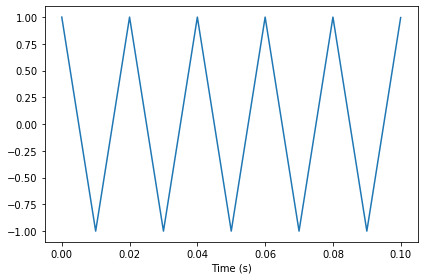

In [3]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

The diff of a triangle wave is a square wave, which explains why the harmonics in a square wave drop off like $1/f$, compared to the triangle wave, which drops off like $1/f^2$.

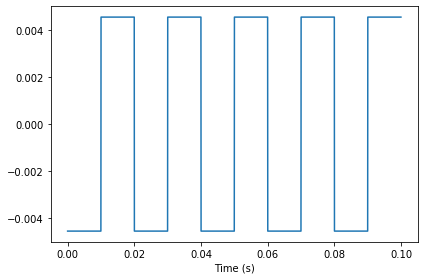

In [4]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

When we take the spectral derivative, we get "ringing" around the discontinuities: https://en.wikipedia.org/wiki/Ringing_(signal)

Mathematically speaking, the problem is that the derivative of the triangle wave is undefined at the points of the triangle.

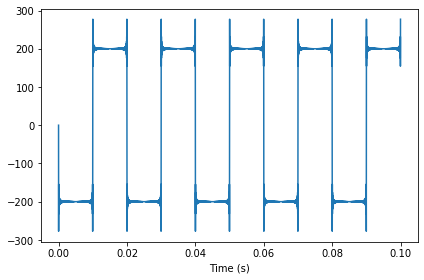

In [5]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

## Exercise 2

The goal of this exercise is to explore the effect of `cumsum` and `integrate` on a signal.  Create a square wave and plot it.  Apply the `cumsum` operator and plot the result.  Compute the spectrum of the square wave, apply `integrate`, and plot the result.  Convert the spectrum back to a wave and plot it.  Are there differences between the effect of `cumsum` and `integrate` for this wave?

*Solution:* Here's the square wave.

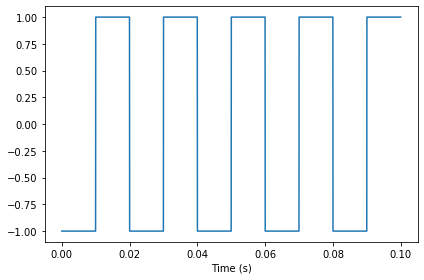

In [6]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

The cumulative sum of a square wave is a triangle wave.  After the previous exercise, that should come as no surprise.

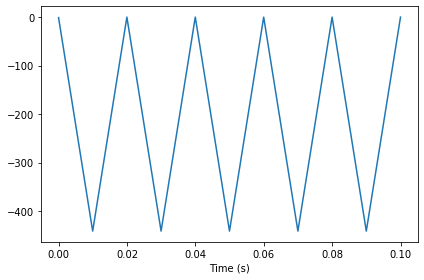

In [7]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

The spectral integral is also a triangle wave, although the amplitude is very different.

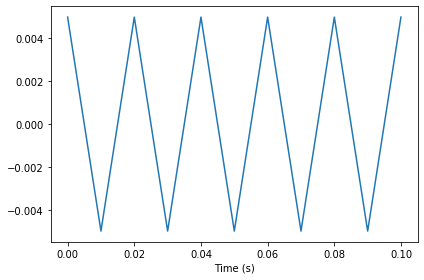

In [8]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

If we unbias and normalize the two waves, they are visually similar.

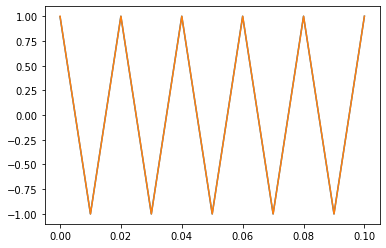

In [9]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

And they are numerically similar, but with only about 3 digits of precision.

In [11]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

## Exercise 3

The goal of this exercise is the explore the effect of integrating twice.  Create a sawtooth wave, compute its spectrum, then apply `integrate` twice.  Plot the resulting wave and its spectrum.  What is the mathematical form of the wave?  Why does it resemble a sinusoid? 

Here's the sawtooth.

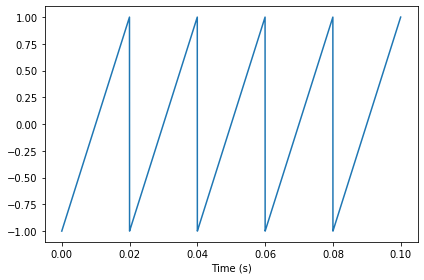

In [12]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

The first cumulative sum of a sawtooth is a parabola:

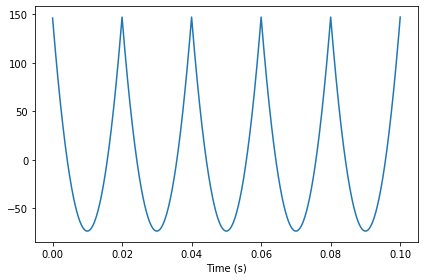

In [13]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

The second cumulative sum is a cubic curve:

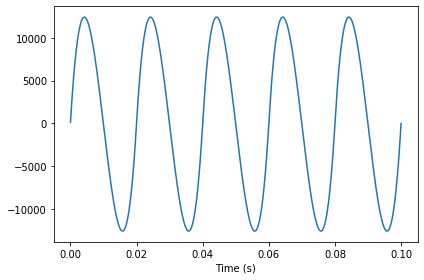

In [14]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Integrating twice also yields a cubic curve.

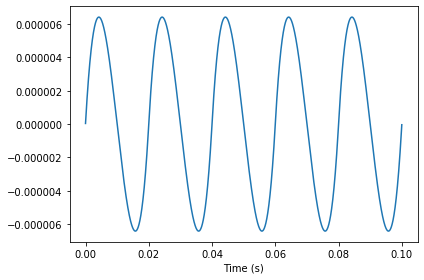

In [15]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

At this point, the result looks more and more like a sinusoid.  The reason is that integration acts like a low pass filter.  At this point we have filtered out almost everything except the fundamental, as shown in the spectrum below:

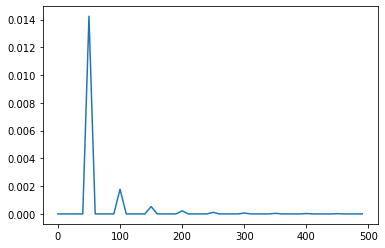

In [16]:
out_wave2.make_spectrum().plot(high=500)

## Exercise 4 

The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative.  Create a `CubicSignal`, which is defined in `thinkdsp`.  Compute the second difference by applying `diff` twice.  What does the result look like.  Compute the second derivative by applying `differentiate` twice.  Does the result look the same?

Plot the filters that corresponds to the 2nd difference and the 2nd derivative and compare them.  Hint: In order to get the filters on the same scale, use a wave with framerate 1.

*Solution:* Here's the cubic signal

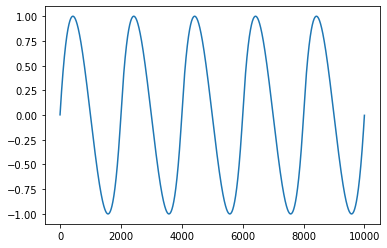

In [17]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

The first difference is a parabola and the second difference is a sawtooth wave (no surprises so far):

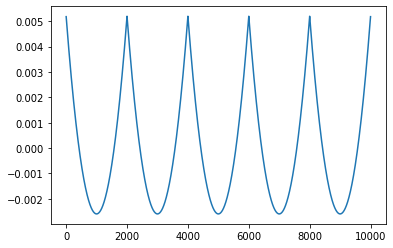

In [18]:
out_wave = in_wave.diff()
out_wave.plot()

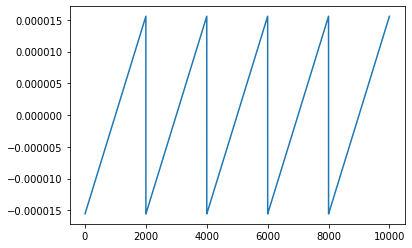

In [19]:
out_wave = out_wave.diff()
out_wave.plot()

When we differentiate twice, we get a sawtooth with some ringing.  Again, the problem is that the deriviative of the parabolic signal is undefined at the points.

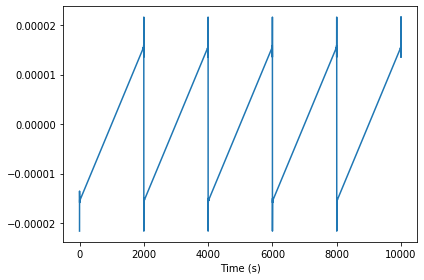

In [20]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

The window of the second difference is -1, 2, -1.  By computing the DFT of the window, we can find the corresponding filter.

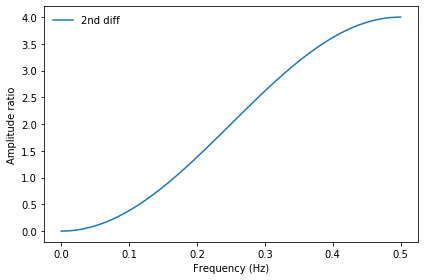

In [21]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

And for the second derivative, we can find the corresponding filter by computing the filter of the first derivative and squaring it.

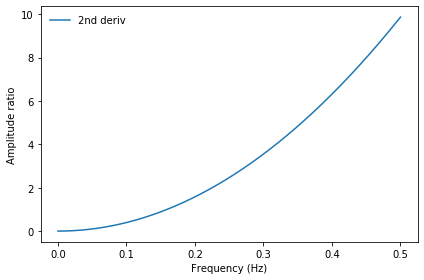

In [22]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Here's what the two filters look like on the same scale:

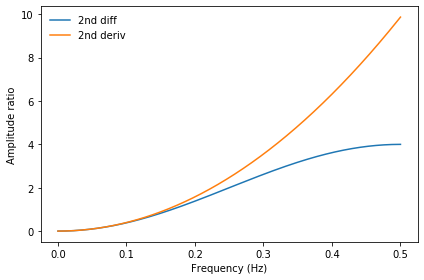

In [23]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Both are high pass filters that amplify the highest frequency components.  The 2nd derivative is parabolic, so it amplifies the highest frequencies the most.  The 2nd difference is a good approximation of the 2nd derivative only at the lowest frequencies, then it deviates substantially.